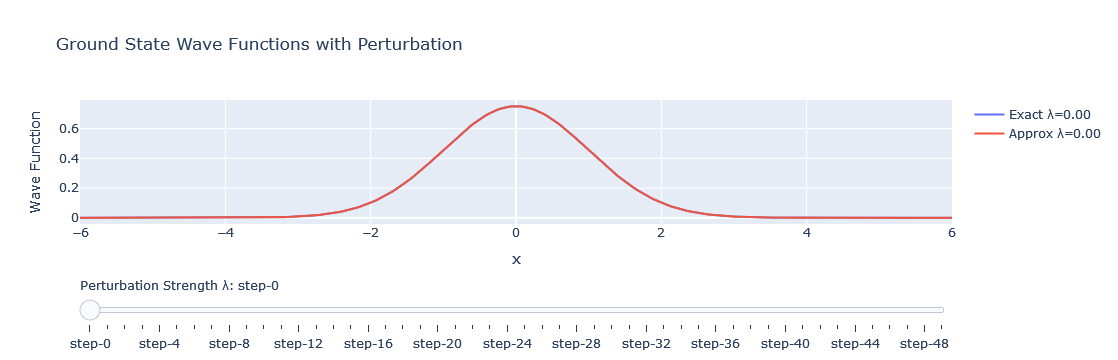

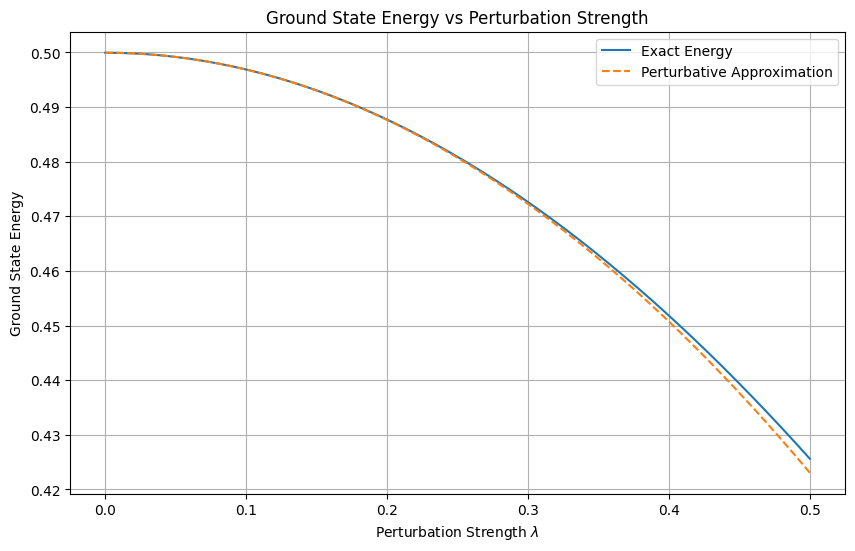

In [20]:
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define constants
m = 1.0      # Mass
omega = 1.0  # Frequency
hbar = 1.0   # Reduced Planck's constant

# Grid settings
x_min = -6.0
x_max = 6.0
N = 300  # Number of grid points
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Kinetic energy operator
T = - (hbar**2 / (2 * m)) * (np.diag(np.ones(N-1), -1) - 2 * np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)) / dx**2

# Potential energy operator for harmonic oscillator
V0 = 0.5 * m * omega**2 * np.diag(x**2)

# Solve the unperturbed Hamiltonian
H0 = T + V0
eigvals0, eigvecs0 = eigh(H0)

# Normalize wavefunctions
eigvecs0 = eigvecs0 / np.sqrt(dx)

psi_0 = eigvecs0[:, 0]
E_0 = eigvals0[0]

# Define the perturbation function
def perturbation(x, lambda_):
    # return lambda_ * x
    return lambda_ x

# Function to calculate perturbative correction to the energy
def perturbative_correction(lambda_, psi_0, E_0, eigvecs0, eigvals0, perturbation):
    correction = 0
    perturb = perturbation(x, lambda_)
    for n in range(1, len(eigvals0)):
        En = eigvals0[n]
        psi_n = eigvecs0[:, n]
        matrix_element = np.dot(psi_0, perturb * psi_n) * dx
        correction += (matrix_element)**2 / (E_0 - En)
    return lambda_ * np.dot(psi_0, perturb * psi_0) * dx + correction

# Function to calculate the first-order correction to the wave function
def wavefunction_correction(lambda_, psi_0, E_0, eigvecs0, eigvals0, perturbation):
    correction = np.zeros_like(psi_0)
    perturb = perturbation(x, lambda_)
    for n in range(1, len(eigvals0)):
        En = eigvals0[n]
        psi_n = eigvecs0[:, n]
        matrix_element = np.dot(psi_0, perturb * psi_n) * dx
        correction += (matrix_element / (E_0 - En)) * psi_n
    return psi_0 + correction

# Define the range of perturbation strengths
lambda_values = np.linspace(0, 0.5, 50)
E_exact = []
E_approx = []
psi_exact = []
psi_approx = []

# Calculate the energies and wave functions for different values of lambda
for lambda_ in lambda_values:
    # Perturbation operator
    V1 = np.diag(perturbation(x, lambda_))
    H = H0 + V1

    # Solve the perturbed Hamiltonian
    eigvals, eigvecs = eigh(H)
    eigvecs = eigvecs / np.sqrt(dx)  # Normalize wavefunctions
    E_exact.append(eigvals[0])
    psi_exact.append(eigvecs[:, 0])

    # Calculate perturbative energy and wave function
    correction_energy = perturbative_correction(lambda_, psi_0, E_0, eigvecs0, eigvals0, perturbation)
    E_approx.append(E_0 + correction_energy)
    psi_approx_wave = wavefunction_correction(lambda_, psi_0, E_0, eigvecs0, eigvals0, perturbation)
    psi_approx.append(psi_approx_wave / np.linalg.norm(psi_approx_wave) / np.sqrt(dx))  # Normalize wavefunction

# Create an interactive plot using Plotly
fig = go.Figure()

# Add traces for each lambda value
for i, lambda_ in enumerate(lambda_values):
    fig.add_trace(go.Scatter(x=x, y=psi_exact[i], mode='lines', name=f'Exact λ={lambda_:.2f}', visible=False))
    fig.add_trace(go.Scatter(x=x, y=psi_approx[i], mode='lines', name=f'Approx λ={lambda_:.2f}', visible=False))

# Set the first trace to be visible
for i in range(2):
    fig.data[i].visible = True

# Create slider steps
steps = []
for i in range(len(lambda_values)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Ground State Wave Functions for λ={lambda_values[i]:.2f}"}],
    )
    for j in range(2):
        step["args"][0]["visible"][2*i + j] = True
    steps.append(step)

# Create sliders
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Perturbation Strength λ: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Ground State Wave Functions with Perturbation",
    xaxis_title="x",
    yaxis_title="Wave Function",
    showlegend=True
)

fig.show()

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, E_exact, label='Exact Energy')
plt.plot(lambda_values, E_approx, label='Perturbative Approximation', linestyle='--')
plt.xlabel('Perturbation Strength $\lambda$')
plt.ylabel('Ground State Energy')
plt.title('Ground State Energy vs Perturbation Strength')
plt.legend()
plt.grid()
plt.show()
